In [1]:
import numpy as np

In [66]:
data1_path = "/Users/bruce/Downloads/datasets/kitti_example/velodyne/000003.bin"
data1_reduced_path = "/Users/bruce/Downloads/datasets/kitti_example/velodyne_reduced/000003.bin"

pointcloud = np.fromfile(data1_path, dtype=np.float32, count=-1).reshape([-1, 4])

print(pointcloud.shape)
x = pointcloud[:, 0]  # x position of point
y = pointcloud[:, 1]  # y position of point
z = pointcloud[:, 2]  # z position of point
r = pointcloud[:, 3]  # reflectance value of point
d = np.sqrt(x ** 2 + y ** 2)  # Map Distance from sensor



(113110, 4)


In [67]:
x

array([68.127, 68.74 , 69.39 , ...,  3.74 ,  3.74 ,  3.763], dtype=float32)

In [68]:
reducepath = data1_reduced_path
pointcloud1 = np.fromfile(str(reducepath), dtype=np.float32, count=-1).reshape([-1, 4])
print(pointcloud1.shape)

(18911, 4)


In [69]:
pointcloud[0]

array([68.127,  0.145,  2.513,  0.   ], dtype=float32)

In [70]:
# -*- coding: utf-8 -*-
 
from mayavi import mlab
import numpy as np

def viz_mayavi(points, vals="distance"):
    x = points[:, 0]  # x position of point
    y = points[:, 1]  # y position of point
    z = points[:, 2]  # z position of point
    fig = mlab.figure(bgcolor=(0, 0, 0), size=(640, 360))
    mlab.points3d(x, y, z,
                          z,          # Values used for Color
                          mode="point",
                          colormap='spectral', # 'bone', 'copper', 'gnuplot'
                          # color=(0, 1, 0),   # Used a fixed (r,g,b) instead
                          figure=fig,
                          )
    mlab.show()
 
if  __name__ == '__main__':
    points = np.fromfile(data1_path, dtype=np.float32).reshape([-1, 4])
    viz_mayavi(points)


qt.qpa.window: <QNSWindow: 0x7fb155cc65c0; contentView=<QNSView: 0x7fb155cc61b0; QCocoaWindow(0x600001da1550, window=QWidgetWindow(0x600000ed0d20, name="QMainWindowClassWindow"))>> has active key-value observers (KVO)! These will stop working now that the window is recreated, and will result in exceptions when the observers are removed. Break in QCocoaWindow::recreateWindowIfNeeded to debug.


In [71]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
 
# 点云读取
pointcloud = np.fromfile(data1_path, dtype=np.float32, count=-1).reshape([-1, 4])
# 设置鸟瞰图范围
side_range = (-40, 40)  # 左右距离
fwd_range = (0, 70.4)  # 后前距离
 
x_points = pointcloud[:, 0]
y_points = pointcloud[:, 1]
z_points = pointcloud[:, 2]
 
# 获得区域内的点
f_filt = np.logical_and(x_points > fwd_range[0], x_points < fwd_range[1])
s_filt = np.logical_and(y_points > side_range[0], y_points < side_range[1])
filter = np.logical_and(f_filt, s_filt)
indices = np.argwhere(filter).flatten()
x_points = x_points[indices]
y_points = y_points[indices]
z_points = z_points[indices]
 
res = 0.1  # 分辨率0.05m
x_img = (-y_points / res).astype(np.int32)
y_img = (-x_points / res).astype(np.int32)
# 调整坐标原点
x_img -= int(np.floor(side_range[0]) / res)
y_img += int(np.floor(fwd_range[1]) / res)
print(x_img.min(), x_img.max(), y_img.min(), x_img.max())
 
# 填充像素值
height_range = (-2, 0.5)
pixel_value = np.clip(a=z_points, a_max=height_range[1], a_min=height_range[0])
 
 
def scale_to_255(a, min, max, dtype=np.uint8):
    return ((a - min) / float(max - min) * 255).astype(dtype)
 
 
pixel_value = scale_to_255(pixel_value, height_range[0], height_range[1])
 
# 创建图像数组
x_max = 1 + int((side_range[1] - side_range[0]) / res)
y_max = 1 + int((fwd_range[1] - fwd_range[0]) / res)
im = np.zeros([y_max, x_max], dtype=np.uint8)
im[y_img, x_img] = pixel_value
 
# imshow （灰度）
im2 = Image.fromarray(im)
im2.show()
 
# imshow （彩色）
# plt.imshow(im, cmap="nipy_spectral", vmin=0, vmax=255)
# plt.show()


284 566 -3 566


## 在前视图进行数据转换和可视化

In [72]:

import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# sn = int(sys.argv[1]) if len(sys.argv)>1 else 7 #default 0-7517
# name = '%06d'%sn # 6 digit zeropadding

img = '/Users/bruce/Downloads/datasets/kitti_example/image_2/000003.png'
binary = data1_path
with open('/Users/bruce/Downloads/datasets/kitti_example/calib/000003.txt','r') as f:
    calib = f.readlines()

In [73]:
calib

['P0: 7.215377000000e+02 0.000000000000e+00 6.095593000000e+02 0.000000000000e+00 0.000000000000e+00 7.215377000000e+02 1.728540000000e+02 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00\n',
 'P1: 7.215377000000e+02 0.000000000000e+00 6.095593000000e+02 -3.875744000000e+02 0.000000000000e+00 7.215377000000e+02 1.728540000000e+02 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00\n',
 'P2: 7.215377000000e+02 0.000000000000e+00 6.095593000000e+02 4.485728000000e+01 0.000000000000e+00 7.215377000000e+02 1.728540000000e+02 2.163791000000e-01 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 2.745884000000e-03\n',
 'P3: 7.215377000000e+02 0.000000000000e+00 6.095593000000e+02 -3.395242000000e+02 0.000000000000e+00 7.215377000000e+02 1.728540000000e+02 2.199936000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 2.729905000000e-03\n',
 'R0_rect: 9.999239000000e-01 9.837760000000e-

In [74]:

# P2 (3 x 4) for left eye
P2 = np.matrix([float(x) for x in calib[2].strip('\n').split(' ')[1:]]).reshape(3,4)
R0_rect = np.matrix([float(x) for x in calib[4].strip('\n').split(' ')[1:]]).reshape(3,3)
print(R0_rect)

# Add a 1 in bottom-right, reshape to 4 x 4
R0_rect = np.insert(R0_rect,3,values=[0,0,0],axis=0)
R0_rect = np.insert(R0_rect,3,values=[0,0,0,1],axis=1)
print(R0_rect)

Tr_velo_to_cam = np.matrix([float(x) for x in calib[5].strip('\n').split(' ')[1:]]).reshape(3,4)
print(Tr_velo_to_cam)
Tr_velo_to_cam = np.insert(Tr_velo_to_cam,3,values=[0,0,0,1],axis=0)
print(Tr_velo_to_cam)


[[ 0.9999239   0.00983776 -0.00744505]
 [-0.0098698   0.9999421  -0.00427846]
 [ 0.00740253  0.00435161  0.9999631 ]]
[[ 0.9999239   0.00983776 -0.00744505  0.        ]
 [-0.0098698   0.9999421  -0.00427846  0.        ]
 [ 0.00740253  0.00435161  0.9999631   0.        ]
 [ 0.          0.          0.          1.        ]]
[[ 7.533745e-03 -9.999714e-01 -6.166020e-04 -4.069766e-03]
 [ 1.480249e-02  7.280733e-04 -9.998902e-01 -7.631618e-02]
 [ 9.998621e-01  7.523790e-03  1.480755e-02 -2.717806e-01]]
[[ 7.533745e-03 -9.999714e-01 -6.166020e-04 -4.069766e-03]
 [ 1.480249e-02  7.280733e-04 -9.998902e-01 -7.631618e-02]
 [ 9.998621e-01  7.523790e-03  1.480755e-02 -2.717806e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]


In [75]:

# read raw data from binary
scan = np.fromfile(binary, dtype=np.float32).reshape((-1,4))
points = scan[:, 0:3] # lidar xyz (front, left, up)
scan.shape
# points.shape
points[0]

array([68.127,  0.145,  2.513], dtype=float32)

In [76]:
# TODO: use fov filter? 
# 在点云坐标的第3个位置插入1，然后变成[n, 4],然后再进行转置
velo = np.insert(points,3,1,axis=1).T
print(velo[0,:].shape)
print(velo.shape)
velo = np.delete(velo,np.where(velo[0,:]<0),axis=1)

# 雷达坐标转换成相机坐标系
cam = P2 * R0_rect * Tr_velo_to_cam * velo
print(cam.shape)
# 把z小于0的删除
cam = np.delete(cam,np.where(cam[2,:]<0)[1],axis=1)


(113110,)
(4, 113110)
(3, 54512)


In [77]:
a=np.arange(12).reshape(3, 4)
np.insert(a, 4, 5, axis=1)

array([[ 0,  1,  2,  3,  5],
       [ 4,  5,  6,  7,  5],
       [ 8,  9, 10, 11,  5]])

In [78]:
# get u,v,z,其实就是x，y除以z然后得到uvz
cam[:2] /= cam[2,:]


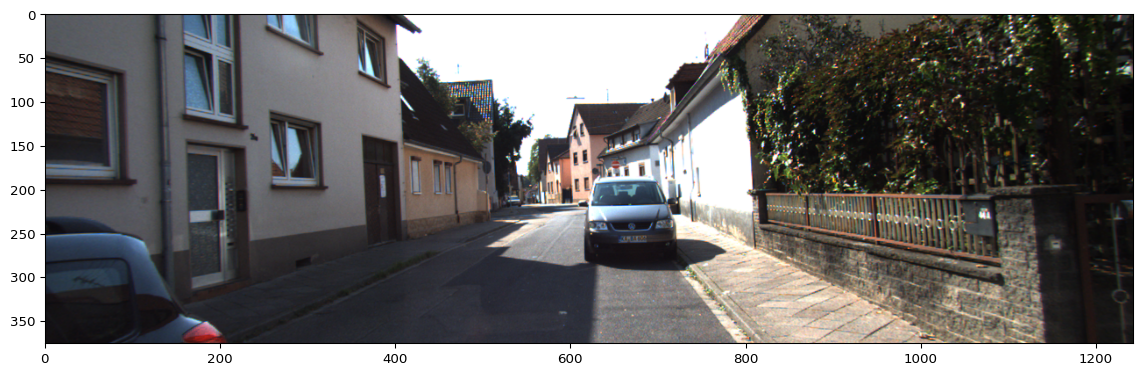

In [79]:
# do projection staff
plt.figure(figsize=(12,5),dpi=96,tight_layout=True)
png = mpimg.imread(img)
IMG_H,IMG_W,_ = png.shape
# restrict canvas in range
plt.axis([0,IMG_W,IMG_H,0])
plt.imshow(png)

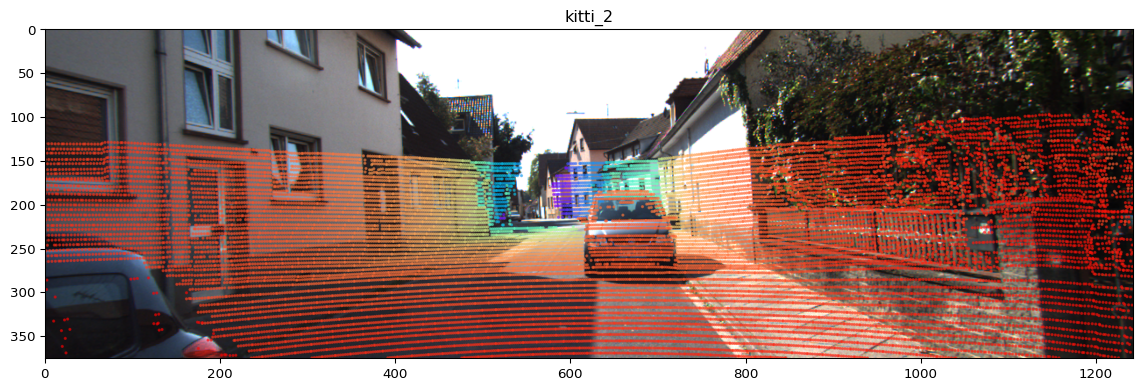

In [80]:
# do projection staff
plt.figure(figsize=(12,5),dpi=96,tight_layout=True)
png = mpimg.imread(img)
IMG_H,IMG_W,_ = png.shape
# restrict canvas in range
plt.axis([0,IMG_W,IMG_H,0])
plt.imshow(png)

# filter point out of canvas，删除这些异常值
u,v,z = cam
u_out = np.logical_or(u<0, u>IMG_W)
v_out = np.logical_or(v<0, v>IMG_H)
outlier = np.logical_or(u_out, v_out)
cam = np.delete(cam,np.where(outlier),axis=1)

# generate color map from depth
u,v,z = cam
plt.scatter([u],[v],c=[z],cmap='rainbow_r',alpha=0.5,s=2)
name = 'kitti_2'
plt.title(name)
plt.savefig('kitti_1.png',bbox_inches='tight')
plt.show()

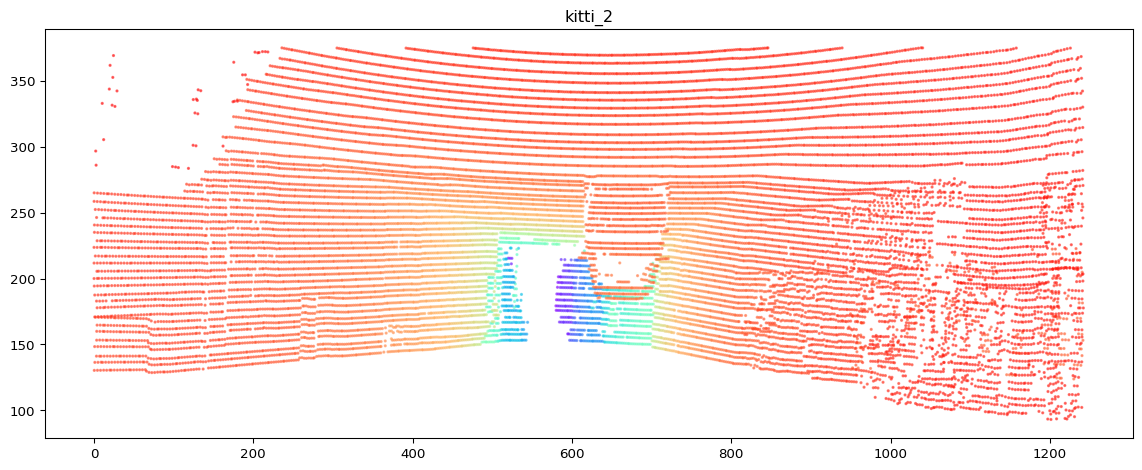

In [81]:
# filter point out of canvas
u,v,z = cam
u_out = np.logical_or(u<0, u>IMG_W)
v_out = np.logical_or(v<0, v>IMG_H)
outlier = np.logical_or(u_out, v_out)
cam = np.delete(cam,np.where(outlier),axis=1)
# generate color map from depth
u,v,z = cam
plt.figure(figsize=(12,5),dpi=96,tight_layout=True)
plt.scatter([u],[v],c=[z],cmap='rainbow_r',alpha=0.5,s=2)
name = 'kitti_2'
plt.title(name)
plt.savefig('kitti_2.png',bbox_inches='tight')
plt.show()

## kitti数据处理流程

In [234]:
import os
import cv2

In [235]:
path = "/Users/bruce/Downloads/datasets/kitti_example"
prefix = "pointpillars"
kitti_infos_dict = {}

In [236]:
kitti_dbinfos_train = {}
db_points_saved_path = os.path.join(path, f'{prefix}_gt_database')
os.makedirs(db_points_saved_path, exist_ok=True)

In [237]:
db_points_saved_path

'/Users/bruce/Downloads/datasets/kitti_example/pointpillars_gt_database'

In [238]:
id = "000003"
data_root = path
split = "training"
sep = '/'

cur_info_dict = {}
img_path = os.path.join(data_root, 'image_2', f'{id}.png')
lidar_path = os.path.join(data_root, 'velodyne', f'{id}.bin')
calib_path = os.path.join(data_root, 'calib', f'{id}.txt')
cur_info_dict['velodyne_path'] = sep.join(lidar_path.split(sep)[-3:])

In [239]:
cur_info_dict

{'velodyne_path': 'kitti_example/velodyne/000003.bin'}

In [240]:
print(img_path)
print(lidar_path)
print(calib_path)

# img_path = "/Users/bruce/Downloads/datasets/kitti_example/image_2/000003.png"
"/Users/bruce/Downloads/datasets/kitti_example/image_2/000003.png"

/Users/bruce/Downloads/datasets/kitti_example/image_2/000003.png
/Users/bruce/Downloads/datasets/kitti_example/velodyne/000003.bin
/Users/bruce/Downloads/datasets/kitti_example/calib/000003.txt


'/Users/bruce/Downloads/datasets/kitti_example/image_2/000003.png'

In [241]:
img = cv2.imread(img_path)

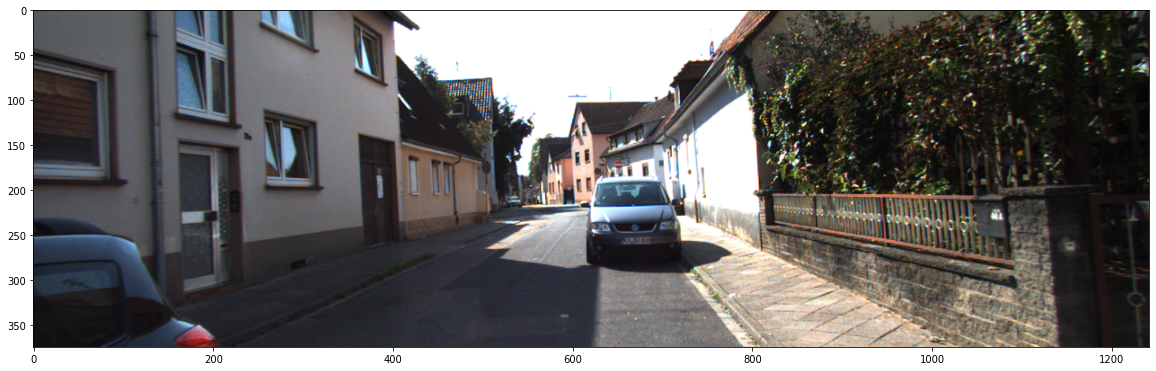

In [242]:
im2 = img[:,:,::-1] 	# transform image to rgb
# print(im2)
plt.figure(figsize=(20, 12))
plt.imshow(im2)
plt.show()

In [243]:
image_shape = img.shape[:2]
cur_info_dict['image'] = {
    'image_shape': image_shape,
    'image_path': sep.join(img_path.split(sep)[-3:]),
    'image_idx': int(id),
}
image_shape

(375, 1242)

In [244]:
def read_calib(file_path, extend_matrix=True):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    lines = [line.strip() for line in lines]
    P0 = np.array([item for item in lines[0].split(' ')[1:]], dtype=np.float).reshape(3, 4)
    P1 = np.array([item for item in lines[1].split(' ')[1:]], dtype=np.float).reshape(3, 4)
    P2 = np.array([item for item in lines[2].split(' ')[1:]], dtype=np.float).reshape(3, 4)
    P3 = np.array([item for item in lines[3].split(' ')[1:]], dtype=np.float).reshape(3, 4)

    R0_rect = np.array([item for item in lines[4].split(' ')[1:]], dtype=np.float).reshape(3, 3)
    Tr_velo_to_cam = np.array([item for item in lines[5].split(' ')[1:]], dtype=np.float).reshape(3, 4)
    Tr_imu_to_velo = np.array([item for item in lines[6].split(' ')[1:]], dtype=np.float).reshape(3, 4)

    if extend_matrix:
        P0 = np.concatenate([P0, np.array([[0, 0, 0, 1]])], axis=0)
        P1 = np.concatenate([P1, np.array([[0, 0, 0, 1]])], axis=0)
        P2 = np.concatenate([P2, np.array([[0, 0, 0, 1]])], axis=0)
        P3 = np.concatenate([P3, np.array([[0, 0, 0, 1]])], axis=0)

        R0_rect_extend = np.eye(4, dtype=R0_rect.dtype)
        R0_rect_extend[:3, :3] = R0_rect
        R0_rect = R0_rect_extend

        Tr_velo_to_cam = np.concatenate([Tr_velo_to_cam, np.array([[0, 0, 0, 1]])], axis=0)
        Tr_imu_to_velo = np.concatenate([Tr_imu_to_velo, np.array([[0, 0, 0, 1]])], axis=0)

    calib_dict=dict(
        P0=P0,
        P1=P1,
        P2=P2,
        P3=P3,
        R0_rect=R0_rect,
        Tr_velo_to_cam=Tr_velo_to_cam,
        Tr_imu_to_velo=Tr_imu_to_velo
    )
    return calib_dict


In [245]:
calib_dict = read_calib(calib_path)
cur_info_dict['calib'] = calib_dict
cur_info_dict

{'velodyne_path': 'kitti_example/velodyne/000003.bin',
 'image': {'image_shape': (375, 1242),
  'image_path': 'kitti_example/image_2/000003.png',
  'image_idx': 3},
 'calib': {'P0': array([[721.5377,   0.    , 609.5593,   0.    ],
         [  0.    , 721.5377, 172.854 ,   0.    ],
         [  0.    ,   0.    ,   1.    ,   0.    ],
         [  0.    ,   0.    ,   0.    ,   1.    ]]),
  'P1': array([[ 721.5377,    0.    ,  609.5593, -387.5744],
         [   0.    ,  721.5377,  172.854 ,    0.    ],
         [   0.    ,    0.    ,    1.    ,    0.    ],
         [   0.    ,    0.    ,    0.    ,    1.    ]]),
  'P2': array([[721.5377    ,   0.        , 609.5593    ,  44.85728   ],
         [  0.        , 721.5377    , 172.854     ,   0.2163791 ],
         [  0.        ,   0.        ,   1.        ,   0.00274588],
         [  0.        ,   0.        ,   0.        ,   1.        ]]),
  'P3': array([[ 721.5377   ,    0.       ,  609.5593   , -339.5242   ],
         [   0.       ,  721.5377   ,

In [246]:
def read_points(file_path, dim=4):
    suffix = os.path.splitext(file_path)[1] 
    assert suffix in ['.bin', '.ply']
    if suffix == '.bin':
        return np.fromfile(file_path, dtype=np.float32).reshape(-1, dim)
    else:
        raise NotImplementedError
        
lidar_points = read_points(lidar_path)


In [247]:
lidar_points.shape

(113110, 4)

In [248]:
points = lidar_points
r0_rect = calib_dict['R0_rect']
tr_velo_to_cam = calib_dict["Tr_velo_to_cam"]
p2 = calib_dict['P2']
image_shape

(375, 1242)

## projection_matrix_to_crt_kitti

这里主要是对P2进行qr分解，然后反击一个R,Q,T三个矩阵用来做后续的运算

In [249]:
print('===p2 is ====\n{}'.format(p2))
CR = p2[0:3, 0:3]
CR

===p2 is ====
[[721.5377       0.         609.5593      44.85728   ]
 [  0.         721.5377     172.854        0.2163791 ]
 [  0.           0.           1.           0.00274588]
 [  0.           0.           0.           1.        ]]


array([[721.5377,   0.    , 609.5593],
       [  0.    , 721.5377, 172.854 ],
       [  0.    ,   0.    ,   1.    ]])

In [250]:
CT = p2[0:3, 3]
CT

array([44.85728   ,  0.2163791 ,  0.00274588])

In [251]:
RinvCinv = np.linalg.inv(CR)

In [252]:
Rinv, Cinv = np.linalg.qr(RinvCinv)

In [253]:
C = np.linalg.inv(Cinv)
R = np.linalg.inv(Rinv)

In [254]:
T = Cinv @ CT

In [255]:
print('the c is: \n{}\n the r is: \n{}\n the t is: \n{}'.format(C,R,T))

the c is: 
[[721.5377   0.     609.5593]
 [  0.     721.5377 172.854 ]
 [  0.       0.       1.    ]]
 the r is: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
 the t is: 
[ 0.05984926 -0.00035793  0.00274588]


通过上面得到的QRT矩阵，这里进行获取视锥的操作，视锥是8个点6个面，z维度的点用分别用0.001和100来进行表示近处和远处的点<br>
然后在利用图像框的大小生成一个4个点的图像平面，然后分别对这个平面进行处理最后可以得到视锥大小

In [256]:
## 获得图片尺寸然后进行建立一个视锥
image_bbox = [0, 0, image_shape[1], image_shape[0]]
image_bbox

[0, 0, 1242, 375]

In [257]:
## get_frustum函数处理部分
near_clip=0.001
far_clip=100
print(C)
fku = C[0, 0]
fkv = -C[1, 1]
u0v0 = C[0:2, 2]
print("fku {}\nfkv {}\nu0v0 {}".format(fku, fkv, u0v0))

[[721.5377   0.     609.5593]
 [  0.     721.5377 172.854 ]
 [  0.       0.       1.    ]]
fku 721.5377
fkv -721.5377
u0v0 [609.5593 172.854 ]


In [258]:
# print([near_clip] * 4 + [far_clip] * 4)
z_points = np.array([near_clip] * 4 + [far_clip] * 4, dtype=C.dtype)[:, np.newaxis]
b = image_bbox
z_points

array([[  0.001],
       [  0.001],
       [  0.001],
       [  0.001],
       [100.   ],
       [100.   ],
       [100.   ],
       [100.   ]])

In [259]:
b
# 图形坐标框的大小

[0, 0, 1242, 375]

In [260]:
## 这里构建一个视锥，其实就是拿到之前qr分解的矩阵，然后对r进行变换，r0用来计算视锥的小平面，r1用来计算视锥的大平面

box_corners = np.array(
    [[b[0], b[1]], [b[0], b[3]], [b[2], b[3]], [b[2], b[1]]], dtype=C.dtype)


print('box_corners \n {}'.format(box_corners))

# 构成视锥体比较近的平面
near_box_corners = (box_corners - u0v0) / np.array(
    [fku / near_clip, -fkv / near_clip], dtype=C.dtype)

# 构成视锥体远处的平面
far_box_corners = (box_corners - u0v0) / np.array(
    [fku / far_clip, -fkv / far_clip], dtype=C.dtype)

# 对这两个点坐标进行合并
ret_xy = np.concatenate([near_box_corners, far_box_corners],
                        axis=0)  # [8, 2]

# 最后和z轴高度进行合并
ret_xyz = np.concatenate([ret_xy, z_points], axis=1)

box_corners 
 [[   0.    0.]
 [   0.  375.]
 [1242.  375.]
 [1242.    0.]]


In [261]:
ret_xyz

array([[ -0.00084481,  -0.00023956,   0.001     ],
       [ -0.00084481,   0.00028016,   0.001     ],
       [  0.00087652,   0.00028016,   0.001     ],
       [  0.00087652,  -0.00023956,   0.001     ],
       [-84.48058916, -23.95633659, 100.        ],
       [-84.48058916,  28.01599972, 100.        ],
       [ 87.65178867,  28.01599972, 100.        ],
       [ 87.65178867, -23.95633659, 100.        ]])

/var/folders/fs/j8sr64ys08x7sbxs1kv6l_mr0000gn/T/ipykernel_1872/165828269.py:12: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



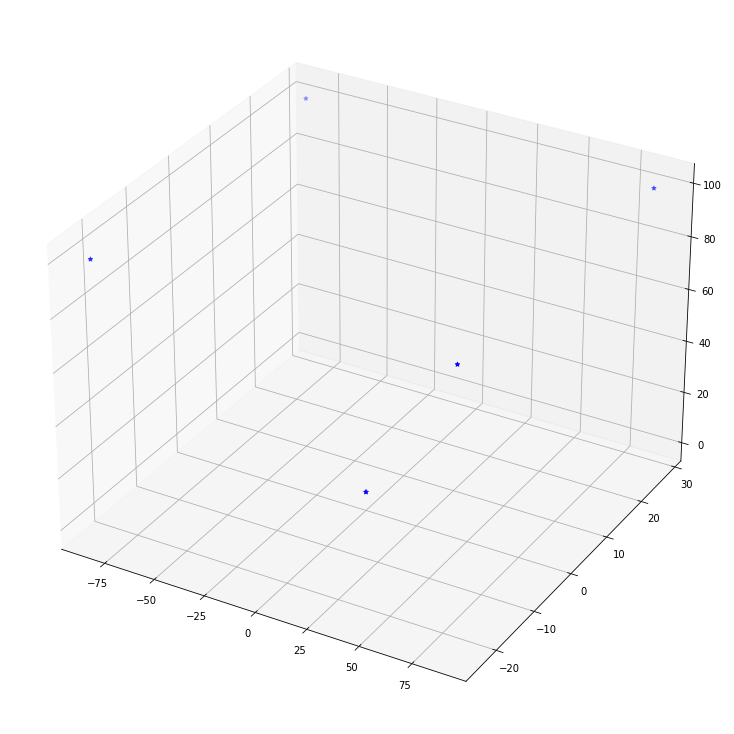

In [262]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x = ret_xyz[:, 0]
y = ret_xyz[:, 1]
z = ret_xyz[:, 2]


fig = plt.figure(figsize=(12, 10))
ax3d = Axes3D(fig)
ax3d.scatter(x,y,z,c="b",marker="*")

plt.show()

In [263]:
import plotly

import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.

plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(
    x = ret_xyz[:4, 0],
    y = ret_xyz[:4, 1],
    z = ret_xyz[:4, 2],
    mode='markers', marker={'size': 10, 'opacity': 0.8,})

# Configure the layout.

layout = go.Layout(margin={'l': 2, 'r': 0, 'b': 0, 't': 0})
data = [trace]
plot_figure = go.Figure(data=data, layout=layout)


# plot_figure.update_layout(
#     scene = dict(
#         xaxis = dict(nticks=4, range=[-100,100],),
#                      yaxis = dict(nticks=4, range=[-10,30],), # 标记4个标签值
#                      zaxis = dict(nticks=6, range=[-2,200],),),
#     width=700,
#     margin=dict(r=20, l=10, b=10, t=10))
 
fig.show()


# Render the plot.

plotly.offline.iplot(plot_figure)

/var/folders/fs/j8sr64ys08x7sbxs1kv6l_mr0000gn/T/ipykernel_1872/872020017.py:31: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



In [264]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)
 
N = 70
print(ret_xyz[:, 2])
fig = go.Figure(data=[
    go.Mesh3d(
        x=(ret_xyz[:, 0]),
        y=(ret_xyz[:, 1]),
        z=(ret_xyz[:, 2]),
        opacity=0.7, # 设置透明度
        color='rgba(244,22,100,0.6)'
                  )])
# 坐标轴设置
fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[-100,100],),
                     yaxis = dict(nticks=4, range=[-50,100],), # 标记4个标签值
                     zaxis = dict(nticks=4, range=[-100,100],),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))
 
fig.show()


[  0.001   0.001   0.001   0.001 100.    100.    100.    100.   ]


In [265]:
np.set_printoptions(suppress=True)
ret_xyz

array([[ -0.00084481,  -0.00023956,   0.001     ],
       [ -0.00084481,   0.00028016,   0.001     ],
       [  0.00087652,   0.00028016,   0.001     ],
       [  0.00087652,  -0.00023956,   0.001     ],
       [-84.48058916, -23.95633659, 100.        ],
       [-84.48058916,  28.01599972, 100.        ],
       [ 87.65178867,  28.01599972, 100.        ],
       [ 87.65178867, -23.95633659, 100.        ]])

ret_xyz最后就是视锥的8个点

In [266]:
(box_corners - u0v0 ) / np.array( [fku / near_clip, -fkv / near_clip])

array([[-0.00084481, -0.00023956],
       [-0.00084481,  0.00028016],
       [ 0.00087652,  0.00028016],
       [ 0.00087652, -0.00023956]])

In [267]:
ret_xyz

array([[ -0.00084481,  -0.00023956,   0.001     ],
       [ -0.00084481,   0.00028016,   0.001     ],
       [  0.00087652,   0.00028016,   0.001     ],
       [  0.00087652,  -0.00023956,   0.001     ],
       [-84.48058916, -23.95633659, 100.        ],
       [-84.48058916,  28.01599972, 100.        ],
       [ 87.65178867,  28.01599972, 100.        ],
       [ 87.65178867, -23.95633659, 100.        ]])

In [268]:
# 对视锥的点再进行一些旋转变换
ret_xyz -= T
ret_xyz

array([[ -0.06069407,   0.00011836,  -0.00174588],
       [ -0.06069407,   0.00063809,  -0.00174588],
       [ -0.05897275,   0.00063809,  -0.00174588],
       [ -0.05897275,   0.00011836,  -0.00174588],
       [-84.54043843, -23.95597866,  99.99725412],
       [-84.54043843,  28.01635765,  99.99725412],
       [ 87.59193941,  28.01635765,  99.99725412],
       [ 87.59193941, -23.95597866,  99.99725412]])

In [269]:
ret_xyz_temp = np.linalg.inv(R) @ ret_xyz.T
ret_xyz_temp

array([[ -0.06069407,  -0.06069407,  -0.05897275,  -0.05897275,
        -84.54043843, -84.54043843,  87.59193941,  87.59193941],
       [  0.00011836,   0.00063809,   0.00063809,   0.00011836,
        -23.95597866,  28.01635765,  28.01635765, -23.95597866],
       [ -0.00174588,  -0.00174588,  -0.00174588,  -0.00174588,
         99.99725412,  99.99725412,  99.99725412,  99.99725412]])

In [270]:
ret_xyz_temp = ret_xyz_temp.T[None, ...]
ret_xyz_temp.shape

(1, 8, 3)

In [271]:
ret_xyz_temp

array([[[ -0.06069407,   0.00011836,  -0.00174588],
        [ -0.06069407,   0.00063809,  -0.00174588],
        [ -0.05897275,   0.00063809,  -0.00174588],
        [ -0.05897275,   0.00011836,  -0.00174588],
        [-84.54043843, -23.95597866,  99.99725412],
        [-84.54043843,  28.01635765,  99.99725412],
        [ 87.59193941,  28.01635765,  99.99725412],
        [ 87.59193941, -23.95597866,  99.99725412]]])

### points_camera2lidar


对上述的从图像大小构成的视锥从相机坐标系转换到雷达坐标系

In [272]:
tr_velo_to_cam

array([[ 0.00753374, -0.9999714 , -0.0006166 , -0.00406977],
       [ 0.01480249,  0.00072807, -0.9998902 , -0.07631618],
       [ 0.9998621 ,  0.00752379,  0.01480755, -0.2717806 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [273]:
r0_rect

array([[ 0.9999239 ,  0.00983776, -0.00744505,  0.        ],
       [-0.0098698 ,  0.9999421 , -0.00427846,  0.        ],
       [ 0.00740253,  0.00435161,  0.9999631 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [274]:
# 在第3维度填充1，0,1表示的是后面1个维度, 这里主要是从cam相机坐标系到激光雷达坐标系 cam to lidar，然后视锥维度变成了1x8x4
extended_xyz = np.pad(ret_xyz_temp, ((0, 0), (0, 0), (0, 1)), 'constant', constant_values=1.0)

In [275]:
# 从相机坐标系到雷达坐标系的逆变换
rt_mat = np.linalg.inv(r0_rect @ tr_velo_to_cam)
rt_mat

array([[ 0.00023477,  0.01044941,  0.99994536,  0.27290343],
       [-0.9999442 ,  0.01056535,  0.00012437, -0.00196927],
       [-0.01056348, -0.9998896 ,  0.0104513 , -0.0722859 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [276]:
camera_points = extended_xyz @ rt_mat.T # (N, 8, 4)
camera_points.shape

(1, 8, 4)

In [277]:
bboxes_corners = camera_points[..., :3]

In [278]:
# 其实就是相机转换到雷达的视锥图
box_point_draw = bboxes_corners[0]
box_point_draw

array([[  0.27114463,   0.05872245,  -0.07178136],
       [  0.27115006,   0.05872794,  -0.07230102],
       [  0.27115046,   0.05700671,  -0.07231921],
       [  0.27114503,   0.05700122,  -0.07179954],
       [ 99.99452043,  84.29308463,  25.81919071],
       [100.53760046,  84.84219081, -26.14740769],
       [100.57801256, -87.28058207, -27.96572416],
       [100.03493253, -87.82968825,  24.00087423]])

In [279]:
np.set_printoptions(precision=8) #设置小数位置为3位
box_point_draw

array([[  0.27114463,   0.05872245,  -0.07178136],
       [  0.27115006,   0.05872794,  -0.07230102],
       [  0.27115046,   0.05700671,  -0.07231921],
       [  0.27114503,   0.05700122,  -0.07179954],
       [ 99.99452043,  84.29308463,  25.81919071],
       [100.53760046,  84.84219081, -26.14740769],
       [100.57801256, -87.28058207, -27.96572416],
       [100.03493253, -87.82968825,  24.00087423]])

In [280]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)
 
N = 70
print(box_point_draw[:, 2])

fig = go.Figure(data=[
    go.Mesh3d(
        x=(box_point_draw[:, 0]),
        y=(box_point_draw[:, 1]),
        z=(box_point_draw[:, 2]),
        opacity=0.7, # 设置透明度
        color='rgba(244,22,100,0.6)'
                  )])


# fig = go.Figure(data=[go.Scatter3d(
#     x=list(1 * box_point_draw[:, 0].flatten()),
#     y=list(1 * box_point_draw[:, 1].flatten()),
#     z=list(1 * box_point_draw[:, 2].flatten()),
#     mode='markers'
# )])

# 坐标轴设置
fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[0,110],),
                     yaxis = dict(nticks=4, range=[-90,90],), # 标记4个标签值
                     zaxis = dict(nticks=4, range=[-30,30],),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))
 
fig.show()


[ -0.07178136  -0.07230102  -0.07231921  -0.07179954  25.81919071
 -26.14740769 -27.96572416  24.00087423]


In [281]:
# bboxes_corners维度是 1x8x3，接下来应该是计算视锥体的6个面的面积，这里rec1~rec6表示6个面的4个点 ，为了进行后面的平面方程用

In [282]:
rec1 = np.stack([bboxes_corners[:, 0], bboxes_corners[:, 1], bboxes_corners[:, 3], bboxes_corners[:, 2]], axis=1)
# (n, 4, 3)

In [283]:
rec2 = np.stack([bboxes_corners[:, 4], bboxes_corners[:, 7], bboxes_corners[:, 6], bboxes_corners[:, 5]], axis=1)
# (n, 4, 3)

In [284]:
rec3 = np.stack([bboxes_corners[:, 0], bboxes_corners[:, 4], bboxes_corners[:, 5], bboxes_corners[:, 1]], axis=1) 
# (n, 4, 3)

In [285]:
rec4 = np.stack([bboxes_corners[:, 2], bboxes_corners[:, 6], bboxes_corners[:, 7], bboxes_corners[:, 3]], axis=1)
# (n, 4, 3)

In [286]:
rec5 = np.stack([bboxes_corners[:, 1], bboxes_corners[:, 5], bboxes_corners[:, 6], bboxes_corners[:, 2]], axis=1)
# (n, 4, 3)

In [287]:
rec6 = np.stack([bboxes_corners[:, 0], bboxes_corners[:, 3], bboxes_corners[:, 7], bboxes_corners[:, 4]], axis=1) 
# (n, 4, 3)

In [288]:
rec1

array([[[ 0.27114463,  0.05872245, -0.07178136],
        [ 0.27115006,  0.05872794, -0.07230102],
        [ 0.27114503,  0.05700122, -0.07179954],
        [ 0.27115046,  0.05700671, -0.07231921]]])

In [289]:
# 一共是6个平面，每个平面是4个点，每个点用3维向量表示
group_rectangle_vertexs = np.stack([rec1, rec2, rec3, rec4, rec5, rec6], axis=1)
group_rectangle_vertexs.shape

(1, 6, 4, 3)

In [290]:
group_rectangle_vertexs

array([[[[  0.27114463,   0.05872245,  -0.07178136],
         [  0.27115006,   0.05872794,  -0.07230102],
         [  0.27114503,   0.05700122,  -0.07179954],
         [  0.27115046,   0.05700671,  -0.07231921]],

        [[ 99.99452043,  84.29308463,  25.81919071],
         [100.03493253, -87.82968825,  24.00087423],
         [100.57801256, -87.28058207, -27.96572416],
         [100.53760046,  84.84219081, -26.14740769]],

        [[  0.27114463,   0.05872245,  -0.07178136],
         [ 99.99452043,  84.29308463,  25.81919071],
         [100.53760046,  84.84219081, -26.14740769],
         [  0.27115006,   0.05872794,  -0.07230102]],

        [[  0.27115046,   0.05700671,  -0.07231921],
         [100.57801256, -87.28058207, -27.96572416],
         [100.03493253, -87.82968825,  24.00087423],
         [  0.27114503,   0.05700122,  -0.07179954]],

        [[  0.27115006,   0.05872794,  -0.07230102],
         [100.53760046,  84.84219081, -26.14740769],
         [100.57801256, -87.28058207, 

In [291]:
group_rectangle_vertexs[:, :, 0]

array([[[ 0.27114463,  0.05872245, -0.07178136],
        [99.99452043, 84.29308463, 25.81919071],
        [ 0.27114463,  0.05872245, -0.07178136],
        [ 0.27115046,  0.05700671, -0.07231921],
        [ 0.27115006,  0.05872794, -0.07230102],
        [ 0.27114463,  0.05872245, -0.07178136]]])

In [292]:
# 这里减法，其实表示的是计算四边形的对角线向量，然后通过这个向量可以计算出面积，所以最后的向量是 1x6x2x3，6个面，2个向量，每个向量3个点表示
vectors = group_rectangle_vertexs[:, :, :2] - group_rectangle_vertexs[:, :, 1:3]
vectors

array([[[[  -0.00000543,   -0.00000549,    0.00051967],
         [   0.00000503,    0.00172672,   -0.00050148]],

        [[  -0.0404121 ,  172.12277288,    1.81831647],
         [  -0.54308003,   -0.54910618,   51.9665984 ]],

        [[ -99.7233758 ,  -84.23436218,  -25.89097206],
         [  -0.54308003,   -0.54910618,   51.9665984 ]],

        [[-100.3068621 ,   87.33758879,   27.89340496],
         [   0.54308003,    0.54910618,  -51.9665984 ]],

        [[-100.26645041,  -84.78346287,   26.07510667],
         [  -0.0404121 ,  172.12277288,    1.81831647]],

        [[  -0.0000004 ,    0.00172123,    0.00001818],
         [ -99.7637875 ,   87.88668947,  -24.07267377]]]])

In [293]:
# 叉乘的含义在2维向量里面是向量够构成的四边形的面积, 在3维空间表示的是两个向量构成平面的法向量
normal_vectors = np.cross(vectors[:, :, 0], vectors[:, :, 1]) # (n, 6, 3)
normal_vectors

array([[[    -0.00000089,     -0.        ,     -0.00000001],
        [  8945.63346168,      1.11258785,     93.49863189],
        [ -4391.59016321,   5196.34549107,      9.01272117],
        [ -4553.95384214,  -5197.4580678 ,   -102.51041807],
        [ -4642.28282959,    181.26238862, -17261.56574843],
        [    -0.04303261,     -0.00182375,      0.17168068]]])

In [294]:
# 通过上面得到的法向量、和一个点，可以得到点法式平面方程， 1x6x3 * 1x6x3
print('group_rectangle_vertexs shape is: ', group_rectangle_vertexs[:, :, 0].shape)

# normal_d是点法式平面方程需要的参数之一，只要任取一个点就能获得这个偏置，最后得到平面的一般方程 ax + by + cz + d = 0
normal_d = np.einsum('ijk,ijk->ij', group_rectangle_vertexs[:, :, 0], normal_vectors)  # (n, 6)
print("normal_d shape is {}".format(normal_d.shape))


group_rectangle_vertexs shape is:  (1, 6, 3)
normal_d shape is (1, 6)


In [295]:
# 平面的点法式方程，6个平面的法向量为：1,6,3，然后每个平面的法向量和每个平面的normal_d进行拼接 1,6,1 这样就能组成6个平面的平面方程
plane_equation_params = np.concatenate([normal_vectors, -normal_d[:, :, None]], axis=-1)
plane_equation_params.shape

(1, 6, 4)

In [296]:
# 用这个6个面的平面方程去筛选点云数据是不是在这6个面构成的6面体内部
frustum_surfaces = plane_equation_params

In [297]:
# 获取原始的点云数据
points = lidar_points[:, :3]
N, n = len(points), len(plane_equation_params)
print(N, n)

113110 1


In [298]:
m = plane_equation_params.shape[1]
# m = 6 表示6个面

# 初始化设置每个店都不是六面体内部的有效点云数据
masks = np.ones((N, n), dtype=np.bool_)
print(masks.shape)

(113110, 1)


这里进行遍历所有点云数据，然后看其在这一个6面体内部的是否满足条件，这里n是1，表示batch数是1，是只看一个图片，一个场景内的点云数据<br>
然后从这里获取平面方程参数，计算这个点是不是在6面体内部，用最后的结果大于等于0来表示当前这个点云数据有效，如果6个面计算的结果都是小于0<br>
那么就说明，这个点不在六面体内部，不是有效点

In [299]:
for i in range(N):
    x, y, z = points[i, :3]
    for j in range(n):
        bbox_plane_equation_params = plane_equation_params[j]
        for k in range(m):
            a, b, c, d = bbox_plane_equation_params[k]
            # 这里就是只要有一个面满足就是保留这个点云，否则，如果在6个面都小于0，说明在点云的视锥外面，那么就不要这个点
            if a * x + b * y + c * z + d >= 0:
                masks[i][j] = False
                break

In [300]:
masks.reshape([-1]).shape

(113110,)

In [301]:
# 筛选之后还剩18911个有效点云
filter_points = lidar_points[masks.reshape([-1])]
filter_points.shape

(18911, 4)

## read label

读取label文件

In [302]:
file_path = "/Users/bruce/Downloads/datasets/kitti_example/label_2/000003.txt"

with open(file_path, 'r') as f:
    lines = f.readlines()
lines = [line.strip().split(' ') for line in lines]
annotation = {}
annotation['name'] = np.array([line[0] for line in lines])
annotation['truncated'] = np.array([line[1] for line in lines], dtype=np.float)
annotation['occluded'] = np.array([line[2] for line in lines], dtype=np.int)
annotation['alpha'] = np.array([line[3] for line in lines], dtype=np.float)
annotation['bbox'] = np.array([line[4:8] for line in lines], dtype=np.float)
annotation['dimensions'] = np.array([line[8:11] for line in lines], dtype=np.float)[:, [2, 0, 1]] # hwl -> camera coordinates (lhw)
annotation['location'] = np.array([line[11:14] for line in lines], dtype=np.float)
annotation['rotation_y'] = np.array([line[14] for line in lines], dtype=np.float)

In [303]:
annotation

{'name': array(['Car', 'DontCare', 'DontCare'], dtype='<U8'),
 'truncated': array([ 0., -1., -1.]),
 'occluded': array([ 0, -1, -1]),
 'alpha': array([  1.55, -10.  , -10.  ]),
 'bbox': array([[614.24, 181.78, 727.31, 284.77],
        [  5.  , 229.89, 214.12, 367.61],
        [522.25, 202.35, 547.77, 219.71]]),
 'dimensions': array([[ 4.15,  1.57,  1.73],
        [-1.  , -1.  , -1.  ],
        [-1.  , -1.  , -1.  ]]),
 'location': array([[    1.  ,     1.75,    13.22],
        [-1000.  , -1000.  , -1000.  ],
        [-1000.  , -1000.  , -1000.  ]]),
 'rotation_y': array([  1.62, -10.  , -10.  ])}

## get_points_num_in_bbox

In [304]:
dimensions = annotation['dimensions']
name = annotation['name']
location = annotation['location']
rotation_y = annotation["rotation_y"]
n_total_bbox = len(dimensions)
n_valid_bbox = len([item for item in name if item != 'DontCare'])

print("num bbox {}, num valid bbox {}".format(n_total_bbox, n_valid_bbox))

num bbox 3, num valid bbox 1


In [305]:
# 有效的3d框和大小
location, dimensions = location[:n_valid_bbox], dimensions[:n_valid_bbox]
rotation_y, name = rotation_y[:n_valid_bbox], name[:n_valid_bbox]
print("3维物体的位置为", location, "3维物体的尺寸为：", dimensions)

# 这里是有效的3d框的位置，大小，以及角速度，一共7个元素，位置是3，大小是3，角度是1
bboxes_camera = np.concatenate([location, dimensions, rotation_y[:, None]], axis=1)
bboxes_camera.shape  # 1x7

3维物体的位置为 [[ 1.    1.75 13.22]] 3维物体的尺寸为： [[4.15 1.57 1.73]]


(1, 7)

## bbox_camera2lidar

这里就是把原来相机框检测到的物体位置坐标转换到雷达坐标系下，大小不用进行转换，只是对xyz进行顺序的互换即可<br>
然后坐标的话按照雷达到相机转换的逆运算进行即可，最后返回一个box框的矩阵，nx7,7表示3维位置坐标(雷达系)，3维大小尺寸

In [306]:
# bboxes_lidar = bbox_camera2lidar(bboxes_camera, tr_velo_to_cam, r0_rect)

# 获得有效框的大小尺寸x，y，z
x_size, y_size, z_size = bboxes_camera[:, 3:4], bboxes_camera[:, 4:5], bboxes_camera[:, 5:6]

# 这里把物体的大小xyz的值给变成 zxy 
xyz_size = np.concatenate([z_size, x_size, y_size], axis=1)

# 对真实框bboxes的位置的坐标最后添加1列，值为1；变成1x4
extended_xyz = np.pad(bboxes_camera[:, :3], ((0, 0), (0, 1)), 'constant', constant_values=1.0)

# xyz 表示从相机坐标转换到雷达坐标系下的坐标值，在雷达坐标系下3d物体框的位置坐标
rt_mat = np.linalg.inv(r0_rect @ tr_velo_to_cam)
xyz = extended_xyz @ rt_mat.T

# 雷达坐标系下的3D框位置坐标，zxy大小尺寸，还有最后一个是旋转角
bboxes_lidar = np.concatenate([xyz[:, :3], xyz_size, bboxes_camera[:, 6:]], axis=1)

# 最后返回的是1个1x7的矩阵，前3列表示物体的位置坐标，中间3列表示物体的大小尺寸，最后1列表示物体的旋转角度 ，这都是在雷达坐标系下的值
bboxes = np.array(bboxes_lidar, dtype=np.float32)
bboxes.shape

(1, 7)

### bbox3d2corners 这里就是把1x7的3d框变成8个角的3维框图

这里就是把上面有效3d框的nx7坐标，转换成nx8x3的框图

In [307]:
centers, dims, angles = bboxes[:, :3], bboxes[:, 3:6], bboxes[:, 6]

# 1.generate bbox corner coordinates, clockwise from minimal point
bboxes_corners = np.array([[-0.5, -0.5, 0], [-0.5, -0.5, 1.0], [-0.5, 0.5, 1.0], [-0.5, 0.5, 0.0],
                           [0.5, -0.5, 0], [0.5, -0.5, 1.0], [0.5, 0.5, 1.0], [0.5, 0.5, 0.0]], 
                           dtype=np.float32)

bboxes_corners

array([[-0.5, -0.5,  0. ],
       [-0.5, -0.5,  1. ],
       [-0.5,  0.5,  1. ],
       [-0.5,  0.5,  0. ],
       [ 0.5, -0.5,  0. ],
       [ 0.5, -0.5,  1. ],
       [ 0.5,  0.5,  1. ],
       [ 0.5,  0.5,  0. ]], dtype=float32)

In [308]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)
 
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
 
fig = go.Figure(data=[go.Scatter3d(
    x=list(1 * bboxes_corners[:, 0].flatten()),
    y=list(1 * bboxes_corners[:, 1].flatten()),
    z=list(1 * bboxes_corners[:, 2].flatten()),
    mode='markers'
)])

fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=10, range=[-1,1],),
                     yaxis = dict(nticks=10, range=[-1,1],), # 标记4个标签值
                     zaxis = dict(nticks=10, range=[0,1],),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))
fig.show()


In [309]:
bboxes_corners = bboxes_corners[None, :, :] * dims[:, None, :] # (1, 8, 3) * (n, 1, 3) -> (n, 8, 3)

In [310]:
# 2. rotate around z axis
rot_sin, rot_cos = np.sin(angles), np.cos(angles)
# in fact, -angle
rot_mat = np.array([[rot_cos, rot_sin, np.zeros_like(rot_cos)],
                    [-rot_sin, rot_cos, np.zeros_like(rot_cos)],
                    [np.zeros_like(rot_cos), np.zeros_like(rot_cos), np.ones_like(rot_cos)]], 
                    dtype=np.float32) # (3, 3, n)

rot_mat.shape

(3, 3, 1)

In [311]:
# 先初始化8个点的坐标，然后乘上框图的大小尺寸，然后再进行z轴旋转，最后平移即可；
rot_mat = np.transpose(rot_mat, (2, 1, 0)) # (n, 3, 3)
bboxes_corners = bboxes_corners @ rot_mat # (n, 8, 3)

In [312]:
# 3. translate to centers，最后bboxes_corners即为所求
bboxes_corners += centers[:, None, :]

In [313]:
bboxes_corners.shape

(1, 8, 3)

In [314]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)
 
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
 
fig = go.Figure(data=[go.Scatter3d(
    x=list(1 * bboxes_corners[0][:, 0].flatten()),
    y=list(1 * bboxes_corners[0][:, 1].flatten()),
    z=list(1 * bboxes_corners[0][:, 2].flatten()),
    mode='markers'
)])

fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=10, range=[10,16],),
                     yaxis = dict(nticks=10, range=[-2,0],), # 标记4个标签值
                     zaxis = dict(nticks=10, range=[-2,0],),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))
fig.show()


### 上面已经把3D物体框的大小和尺寸进行准换成8个顶点，然后后面再进行求这个6面体的平面方程

In [315]:
## 这里接着把8个坐标分成6个平面，然偶
rec1_ = np.stack([bboxes_corners[:, 0], bboxes_corners[:, 1], bboxes_corners[:, 3], bboxes_corners[:, 2]], axis=1) # (n, 4, 3)
rec2_ = np.stack([bboxes_corners[:, 4], bboxes_corners[:, 7], bboxes_corners[:, 6], bboxes_corners[:, 5]], axis=1) # (n, 4, 3)
rec3_ = np.stack([bboxes_corners[:, 0], bboxes_corners[:, 4], bboxes_corners[:, 5], bboxes_corners[:, 1]], axis=1) # (n, 4, 3)
rec4_ = np.stack([bboxes_corners[:, 2], bboxes_corners[:, 6], bboxes_corners[:, 7], bboxes_corners[:, 3]], axis=1) # (n, 4, 3)
rec5_ = np.stack([bboxes_corners[:, 1], bboxes_corners[:, 5], bboxes_corners[:, 6], bboxes_corners[:, 2]], axis=1) # (n, 4, 3)
rec6_ = np.stack([bboxes_corners[:, 0], bboxes_corners[:, 3], bboxes_corners[:, 7], bboxes_corners[:, 4]], axis=1) # (n, 4, 3)
group_rectangle_vertexs_v = np.stack([rec1_, rec2_, rec3_, rec4_, rec5_, rec6_], axis=1)

In [316]:
group_rectangle_vertexs_v.shape

(1, 6, 4, 3)

In [317]:
# 1. generate vectors for a x b
vectors_v = group_rectangle_vertexs_v[:, :, :2] - group_rectangle_vertexs_v[:, :, 1:3]  # nx6x2x3
normal_vectors_v = np.cross(vectors_v[:, :, 0], vectors_v[:, :, 1])  # (n, 6, 3)
# 爱因斯坦标记法，主要是 a和b相乘，然后
normal_d_v = np.einsum('ijk,ijk->ij', group_rectangle_vertexs_v[:, :, 0], normal_vectors_v)  # (n, 6)

# 1x6x3 和 1x6x1 进行concat 之后就是 1x6x4
plane_equation_params_v = np.concatenate([normal_vectors_v, -normal_d_v[:, :, None]], axis=-1)

最后得到这个3d物体框的点云目标框的点法式平面方程

这里和上面类似，就是获取3D目标框里面有多少是有效的点云，主要是对目标框里面的点云进行一个甄别和计数

In [318]:
points = filter_points
points.shape

(18911, 4)

In [319]:
N, n = len(points), len(plane_equation_params_v)
m = plane_equation_params_v.shape[1]
masks_v = np.ones((N, n), dtype=np.bool_)
for i in range(N):
    x, y, z = points[i, :3]
    for j in range(n):
        bbox_plane_equation_params_v = plane_equation_params_v[j]
        for k in range(m):
            a, b, c, d = bbox_plane_equation_params_v[k]
            if a * x + b * y + c * z + d >= 0:
                masks_v[i][j] = False
                break


In [320]:
masks_v.shape

(18911, 1)

最后返回的是 masks_v, n_total_bbox, n_valid_bbox, bboxes_lidar, name

In [336]:
indices = masks_v
n_total_bbox
n_valid_bbox
bboxes_lidar = bboxes
print("indices.shape: \n{}\nn_total_bbox is {}\nn_valid_bbox is {} \nbboxes_lidar is {}\nname is {}\n".
      format(indices.shape,
             n_total_bbox,
             n_valid_bbox,
             bboxes_lidar, 
             name))

indices.shape: 
(18911, 1)
n_total_bbox is 3
n_valid_bbox is 1 
bboxes_lidar is [[13.510702 -0.98178  -1.69449   1.73      4.15      1.57      1.62    ]]
name is ['Car']



In [322]:
# 最后改目标框的点云数是
points_num = np.sum(indices, axis=0)
points_num

array([674])

In [323]:
# 无效框为
non_valid_points_num = [-1] * (n_total_bbox - n_valid_bbox)
non_valid_points_num

[-1, -1]

In [324]:
points_num = np.concatenate([points_num, non_valid_points_num], axis=0)
points_num = np.array(points_num, dtype=np.int)
points_num

array([674,  -1,  -1])

In [326]:
annotation['num_points_in_gt'] = points_num

In [327]:
annotation

{'name': array(['Car', 'DontCare', 'DontCare'], dtype='<U8'),
 'truncated': array([ 0., -1., -1.]),
 'occluded': array([ 0, -1, -1]),
 'alpha': array([  1.55, -10.  , -10.  ]),
 'bbox': array([[614.24, 181.78, 727.31, 284.77],
        [  5.  , 229.89, 214.12, 367.61],
        [522.25, 202.35, 547.77, 219.71]]),
 'dimensions': array([[ 4.15,  1.57,  1.73],
        [-1.  , -1.  , -1.  ],
        [-1.  , -1.  , -1.  ]]),
 'location': array([[    1.  ,     1.75,    13.22],
        [-1000.  , -1000.  , -1000.  ],
        [-1000.  , -1000.  , -1000.  ]]),
 'rotation_y': array([  1.62, -10.  , -10.  ]),
 'num_points_in_gt': array([674,  -1,  -1])}

In [329]:
cur_info_dict['annos'] = annotation

{'velodyne_path': 'kitti_example/velodyne/000003.bin',
 'image': {'image_shape': (375, 1242),
  'image_path': 'kitti_example/image_2/000003.png',
  'image_idx': 3},
 'calib': {'P0': array([[721.5377,   0.    , 609.5593,   0.    ],
         [  0.    , 721.5377, 172.854 ,   0.    ],
         [  0.    ,   0.    ,   1.    ,   0.    ],
         [  0.    ,   0.    ,   0.    ,   1.    ]]),
  'P1': array([[ 721.5377,    0.    ,  609.5593, -387.5744],
         [   0.    ,  721.5377,  172.854 ,    0.    ],
         [   0.    ,    0.    ,    1.    ,    0.    ],
         [   0.    ,    0.    ,    0.    ,    1.    ]]),
  'P2': array([[721.5377    ,   0.        , 609.5593    ,  44.85728   ],
         [  0.        , 721.5377    , 172.854     ,   0.2163791 ],
         [  0.        ,   0.        ,   1.        ,   0.00274588],
         [  0.        ,   0.        ,   0.        ,   1.        ]]),
  'P3': array([[ 721.5377   ,    0.       ,  609.5593   , -339.5242   ],
         [   0.       ,  721.5377   ,

In [331]:
def bbox_camera2lidar(bboxes, tr_velo_to_cam, r0_rect):
    '''
    bboxes: shape=(N, 7)
    tr_velo_to_cam: shape=(4, 4)
    r0_rect: shape=(4, 4)
    return: shape=(N, 7)
    '''
    x_size, y_size, z_size = bboxes[:, 3:4], bboxes[:, 4:5], bboxes[:, 5:6]
    xyz_size = np.concatenate([z_size, x_size, y_size], axis=1)
    extended_xyz = np.pad(bboxes[:, :3], ((0, 0), (0, 1)), 'constant', constant_values=1.0)
    rt_mat = np.linalg.inv(r0_rect @ tr_velo_to_cam)
    xyz = extended_xyz @ rt_mat.T
    bboxes_lidar = np.concatenate([xyz[:, :3], xyz_size, bboxes[:, 6:]], axis=1)
    return np.array(bboxes_lidar, dtype=np.float32)


In [332]:
def bbox3d2corners(bboxes):
    '''
    bboxes: shape=(n, 7)
    return: shape=(n, 8, 3)
           ^ z   x            6 ------ 5
           |   /             / |     / |
           |  /             2 -|---- 1 |   
    y      | /              |  |     | | 
    <------|o               | 7 -----| 4
                            |/   o   |/    
                            3 ------ 0 
    x: front, y: left, z: top
    '''
    centers, dims, angles = bboxes[:, :3], bboxes[:, 3:6], bboxes[:, 6]

    # 1.generate bbox corner coordinates, clockwise from minimal point
    bboxes_corners = np.array([[-0.5, -0.5, 0], [-0.5, -0.5, 1.0], [-0.5, 0.5, 1.0], [-0.5, 0.5, 0.0],
                               [0.5, -0.5, 0], [0.5, -0.5, 1.0], [0.5, 0.5, 1.0], [0.5, 0.5, 0.0]],
                              dtype=np.float32)
    bboxes_corners = bboxes_corners[None, :, :] * dims[:, None, :]  # (1, 8, 3) * (n, 1, 3) -> (n, 8, 3)

    # 2. rotate around z axis
    rot_sin, rot_cos = np.sin(angles), np.cos(angles)
    # in fact, -angle
    rot_mat = np.array([[rot_cos, rot_sin, np.zeros_like(rot_cos)],
                        [-rot_sin, rot_cos, np.zeros_like(rot_cos)],
                        [np.zeros_like(rot_cos), np.zeros_like(rot_cos), np.ones_like(rot_cos)]],
                       dtype=np.float32)  # (3, 3, n)
    rot_mat = np.transpose(rot_mat, (2, 1, 0))  # (n, 3, 3)
    bboxes_corners = bboxes_corners @ rot_mat  # (n, 8, 3)

    # 3. translate to centers
    bboxes_corners += centers[:, None, :]
    return bboxes_corners

In [333]:
def group_plane_equation(bbox_group_rectangle_vertexs):
    """
    bbox_group_rectangle_vertexs: shape=(n, 6, 4, 3)
    return: shape=(n, 6, 4)
    """
    # 1. generate vectors for a x b
    vectors = bbox_group_rectangle_vertexs[:, :, :2] - bbox_group_rectangle_vertexs[:, :, 1:3]  # nx6x2x3
    normal_vectors = np.cross(vectors[:, :, 0], vectors[:, :, 1])  # (n, 6, 3)
    # 爱因斯坦标记法，主要是 a和b相乘，然后
    normal_d = np.einsum('ijk,ijk->ij', bbox_group_rectangle_vertexs[:, :, 0], normal_vectors)  # (n, 6)

    # 1x6x3 和 1x6x1 进行concat 之后就是 1x6x4
    plane_equation_params = np.concatenate([normal_vectors, -normal_d[:, :, None]], axis=-1)
    return plane_equation_params

In [334]:
def points_in_bboxes(points, plane_equation_params):
    '''
    points: shape=(N, 3)
    plane_equation_params: shape=(n, 6, 4)
    return: shape=(N, n), bool
    '''
    N, n = len(points), len(plane_equation_params)
    m = plane_equation_params.shape[1]
    masks = np.ones((N, n), dtype=np.bool_)
    for i in range(N):
        x, y, z = points[i, :3]
        for j in range(n):
            bbox_plane_equation_params = plane_equation_params[j]
            for k in range(m):
                a, b, c, d = bbox_plane_equation_params[k]
                if a * x + b * y + c * z + d >= 0:
                    masks[i][j] = False
                    break
    return masks

In [335]:
points=lidar_points
r0_rect=calib_dict['R0_rect'].astype(np.float32)
tr_velo_to_cam=calib_dict['Tr_velo_to_cam'].astype(np.float32)
dimensions=annotation['dimensions'].astype(np.float32)
location=annotation['location'].astype(np.float32)
rotation_y=annotation['rotation_y'].astype(np.float32)
name=annotation['name']


n_total_bbox = len(dimensions)
n_valid_bbox = len([item for item in name if item != 'DontCare'])
location, dimensions = location[:n_valid_bbox], dimensions[:n_valid_bbox]
rotation_y, name = rotation_y[:n_valid_bbox], name[:n_valid_bbox]
bboxes_camera = np.concatenate([location, dimensions, rotation_y[:, None]], axis=1)
bboxes_lidar = bbox_camera2lidar(bboxes_camera, tr_velo_to_cam, r0_rect)  # 这里就是把有效框进行准换，从相机到雷达即可
bboxes_corners = bbox3d2corners(bboxes_lidar)  # 把nx7的3d框进行转换到8个顶点的目标框
group_rectangle_vertexs_v = (bboxes_corners)  # 获取这8个顶点
frustum_surfaces = group_plane_equation(group_rectangle_vertexs_v)  # 获取目标框的8个平面方程
indices = points_in_bboxes(points[:, :3], frustum_surfaces)  # (N, n), N is points num, n is bboxes number

ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)